In [2]:
import uproot
import numpy as np
f = uproot.open('/teams/DSC180A_FA21_A00/a11/train_mass_hbb/BulkGravitonToHHTo4Q_MX-600to6000_MH-15to250_part1_TuneCP5_13TeV-madgraph_pythia8/nano_mc2017_1-1_Skim.root')

In [3]:
tree = f['Events']

In [4]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fj_idx               | int32_t                  | AsDtype('>i4')
fj_pt                | float                    | AsDtype('>f4')
fj_eta               | float                    | AsDtype('>f4')
fj_phi               | float                    | AsDtype('>f4')
fj_mass              | float                    | AsDtype('>f4')
fj_msoftdrop         | float                    | AsDtype('>f4')
fj_lsf3              | float                    | AsDtype('>f4')
fj_deepTagMD_H4qv... | float                    | AsDtype('>f4')
fj_deepTag_HvsQCD    | float                    | AsDtype('>f4')
fj_PN_H4qvsQCD       | float                    | AsDtype('>f4')
fj_PN_XbbvsQCD       | float                    | AsDtype('>f4')
fj_genjetmsd         | float                    | AsDtype('>f4')
fj_genjetmass        | float                    | AsDtype(

In [5]:
# Returns a dictionary
features = tree.arrays(['fj_msoftdrop',
                        'fj_pt',
                        'fj_eta'], 
                       entry_stop=200000,
                       library='np')

labels = tree.arrays(['fj_genjetmsd',
                      'fj_genRes_mass',
                      'fj_H_bb'],
                     entry_stop=200000,                
                     library='np')

In [6]:
# selection for plots (Hbb, pT > 500, mSD > 40, |eta| < 2.5, gen_res_mass > 40)
selection =  labels['fj_H_bb'] * (features['fj_pt'] > 500) * (features['fj_msoftdrop'] > 40) * (labels['fj_genRes_mass'] > 40) * (np.abs(features['fj_eta']) < 2.5)


In [7]:
labels['fj_H_bb']

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

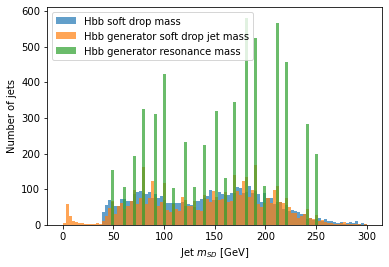

In [6]:
import matplotlib.pyplot as plt

plt.figure()

# reconstructed soft drop mass, see https://arxiv.org/abs/1402.2657
plt.hist(features['fj_msoftdrop'],
         weights=selection,
         bins=np.linspace(0,300,101),
         alpha=0.7,
         label='Hbb soft drop mass')

# generator-level soft drop mass (based on generator-level particles in the jet, i.e. before any detector intractions)
plt.hist(labels['fj_genjetmsd'],
         weights=selection,
         bins=np.linspace(0,300,101),
         alpha=0.7,
         label='Hbb generator soft drop jet mass')

# generator-level resonance mass (based on the real particle before it decayed)
plt.hist(labels['fj_genRes_mass'],
         weights=selection,
         bins=np.linspace(0,300,101),
         alpha=0.7,
         label='Hbb generator resonance mass')

plt.xlabel(r'Jet $m_{SD}$ [GeV]')
plt.ylabel('Number of jets')
plt.legend()
plt.show()

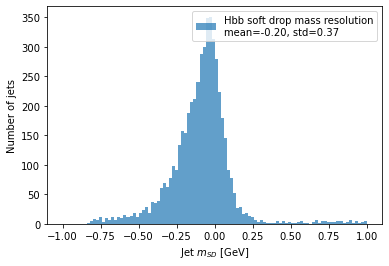

In [7]:
plt.figure()

# standard resolution is defined like this
res_softdrop = (features['fj_msoftdrop'] - labels['fj_genRes_mass'])/labels['fj_genRes_mass']

# let's restrict to -1 and 1
mask = (res_softdrop > -1) & (res_softdrop < 1)

# ideally the mean should be ~0 and the standard deviation should be as small as possible
mean = np.mean(res_softdrop[mask])
std = np.std(res_softdrop[mask])

plt.hist(res_softdrop,
         weights=selection,
         bins=np.linspace(-1,1,101),
         alpha=0.7,
         label=f'Hbb soft drop mass resolution\nmean={mean:.2f}, std={std:.2f}')


plt.xlabel(r'Jet $m_{SD}$ [GeV]')
plt.ylabel('Number of jets')
plt.legend()
plt.show()

So the soft drop mass for H(bb) jets in this mass and pT range has a "bias" of -20% and a resolution of about 37%.

The project goal is to create a NN based on PF canddiate information that achieves better resolutino 